<a href="https://colab.research.google.com/github/teja-1403/CODSOFT_4/blob/main/spam_sms_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAM SMS DETECTION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**2. Loading and exploring dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SSD/Spam SMS Detection Dataset/spam.csv', encoding='latin1')
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
# Rename columns
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [ ]:
# Count occurrences of each target label
counts = data['target'].value_counts()
print(counts)

target
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
# Convert target variable
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])
data.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Check for missing values and duplicates
print(data.isnull().sum())
print(data.duplicated().sum())

target    0
text      0
dtype: int64
403


In [ ]:
# Remove duplicates
data = data.drop_duplicates(keep='first')
data.shape

(5169, 2)

**3. Data visualization**

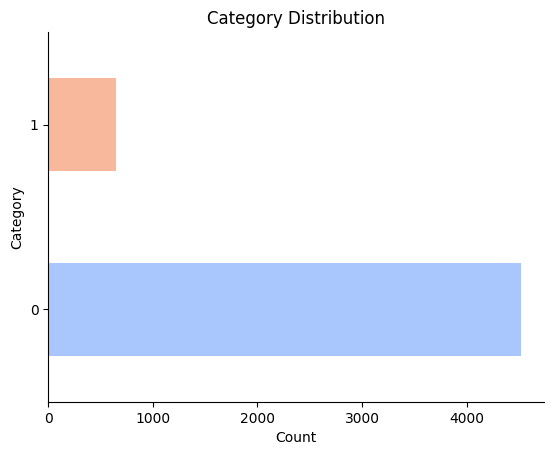

In [ ]:
# Category Distribution (Bar Chart)
data.groupby('target').size().plot(
    kind='barh',
    color=sns.color_palette('coolwarm', n_colors=2)
)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Category Distribution')
plt.show()

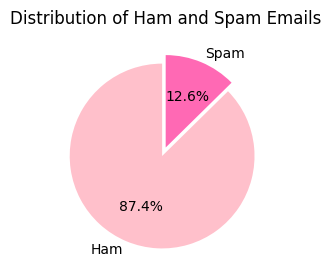

In [ ]:
# Spam vs Ham Distribution (Pie Chart)
counts = data['target'].value_counts()
labels = ['Ham', 'Spam']
colors = ['#FFC0CB', '#FF69B4']
plt.figure(figsize=(3, 3))
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0)
)
plt.title('Distribution of Ham and Spam Emails')
plt.show()

**4. Text Preprocessing**

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
nlp = nltk.WordNetLemmatizer()
X, y = data.text, data.target

documents = []
for sen in range(len(X)):
    document = re.sub(r'\W', ' ', str(X.iloc[sen]))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)
    document = document.lower()
    document = ' '.join([nlp.lemmatize(word) for word in document.split()])
    documents.append(document)

In [ ]:
print("Text before preprocessing:", X[1])
print("Text after preprocessing:", documents[1])

Text before preprocessing: Ok lar... Joking wif u oni...
Text after preprocessing: ok lar joking wif oni


**5. TF-IDF Vectorization**

In [ ]:
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

**6. Model training**

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

**7. Model evaluation**

In [ ]:
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred))

Random Forest Confusion Matrix:
 [[884   1]
 [ 19 130]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.99      0.87      0.93       149

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Random Forest Accuracy Score: 0.9806576402321083


In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred_nb = classifier_nb.predict(X_test)

In [ ]:
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy Score:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Confusion Matrix:
 [[885   0]
 [ 22 127]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Naive Bayes Accuracy Score: 0.9787234042553191


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(max_iter=1000, random_state=0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred_lr = classifier_lr.predict(X_test)

In [ ]:
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Confusion Matrix:
 [[885   0]
 [ 37 112]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       885
           1       1.00      0.75      0.86       149

    accuracy                           0.96      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.96      0.96      1034

Logistic Regression Accuracy Score: 0.9642166344294004


In [ ]:
from sklearn.svm import SVC

classifier_svm = SVC(kernel='linear', random_state=0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_svm = classifier_svm.predict(X_test)

In [ ]:
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))

SVM Confusion Matrix:
 [[883   2]
 [ 18 131]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.98      0.88      0.93       149

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

SVM Accuracy Score: 0.9806576402321083
